In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from scipy.ndimage import rotate as sci_rotate

In [2]:
import pink_utils as pu

som = pu.som('../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_6.bin')

In [3]:
som.file_head

(2, 15, 15, 1, 118, 118)

In [4]:
nx, ny = som.file_head[1:3]

dd = {}

for x in range(nx):
    for y in range(ny):
        n = som.get_neuron(x=x, y=y, channel=1)
        dd[(y, x)] = pu.neuron(n.T)

/Users/gal16b/miniconda3/envs/pink_e3/lib/python3.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


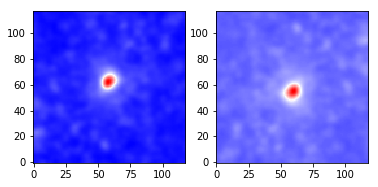

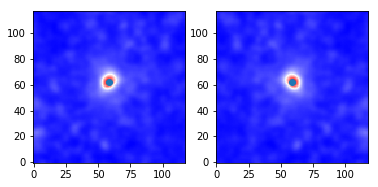

In [5]:
key = (1,0)

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow( dd[key].img , origin='lower left', cmap='bwr')
ax2.imshow( dd[key].transform((0, np.pi)), origin='lower left', cmap='bwr')

fig.show()

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.imshow( dd[key].img , origin='lower left', cmap='bwr')
pos = dd[key].argmax()
ax1.scatter(pos[1], pos[0])

transform = (1,0)
ax2.imshow( dd[key].transform(transform), origin='lower left', cmap='bwr')
pos = dd[key].argmax(transform=transform)
ax2.scatter(pos[1], pos[0])


fig.show()



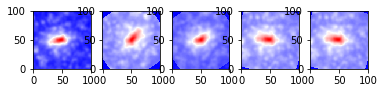

In [6]:
key = (14,0)

size=(100,100)
a = dd[key].transform((0,0), size=size)
b = dd[key].transform((0,np.pi*1.2), size=size)

c = (a+b)/2
c = c / np.sum(c)

d = dd[key].transform((0,np.pi*1.9), size=size)
e = (c+d)/2

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)

ax1.imshow(a, cmap='bwr', origin='lower left')
ax2.imshow(b, cmap='bwr', origin='lower left')
ax3.imshow(c, cmap='bwr', origin='lower left')
ax4.imshow(d, cmap='bwr', origin='lower left')
ax5.imshow(e, cmap='bwr', origin='lower left')

fig.show()

In [7]:
n = som.get_neuron(x=x, y=y, channel=0)
a = pu.neuron(n.T, mask=[[[30,30],[90,90]]])

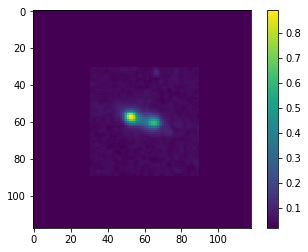

In [8]:
fig, ax = plt.subplots(1,1)

im = ax.imshow(np.sqrt(a.apply_mask()))

fig.colorbar(im)
fig.show()

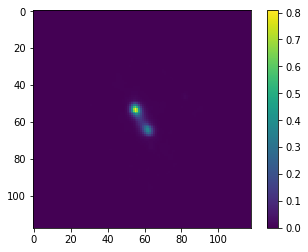

In [9]:
fig, ax = plt.subplots(1,1)

im = ax.imshow(a.transform((0, np.pi/4), mask=True))

fig.colorbar(im)
fig.show()

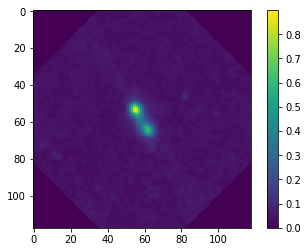

In [10]:
fig, ax = plt.subplots(1,1)

im = ax.imshow(np.sqrt(a.transform((0, np.pi/4))))

fig.colorbar(im)
fig.show()

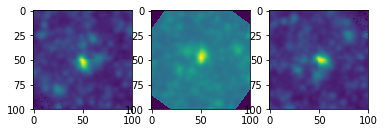

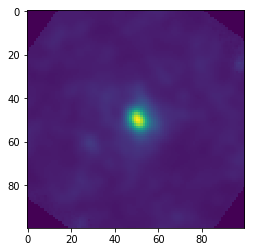

In [17]:
key = (0,14)

size=(100,100)
a = dd[key].transform((0,0), size=size)
b = dd[key].transform((0,np.pi*1.2), size=size)
c = dd[key].transform((1,np.pi*0.5), size=size)

a /= a.sum()
b /= b.sum()
c /= c.sum()

fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.imshow(a)
ax2.imshow(b)
ax3.imshow(c)

fig.show()

avg = (a*b*c)/3.

fig, ax = plt.subplots(1,1)

ax.imshow(avg)

fig.show()